#Week 6 Group 5 - Interpreting t-SNE & UMAP
Aria Alinejad, Aleksei Berdiuzhenko, Simen Dymbe, Amanda Ledell, Cameron Louis Penne and Nicole Quattrini

_October 2nd 2024_

Outline
- What are global/local structures (Cameron)
    - With figure (Mammut)
- Examples
    - IRIS ✅ (Needs small update)
    - Speech (Simen)
    - Fashion MNIST ✅
- Miss-readings UMAP/tSNE (steal the website ?) (Aria)
- Link website

# Background
- Non-linear DR technqiues
  - t-SNE
  - UMAP
- **Purpose**: optimize low dimensional represetnation of data to be similar to the high dimensional representation of the data

# Global vs Local Structures:
- **Global structure**: Overall arrangement of data across the entire dataset in the high dimensional space

- **Local structure**: Arrangement of nearby points across a portion of the dataset in the high dimensional space

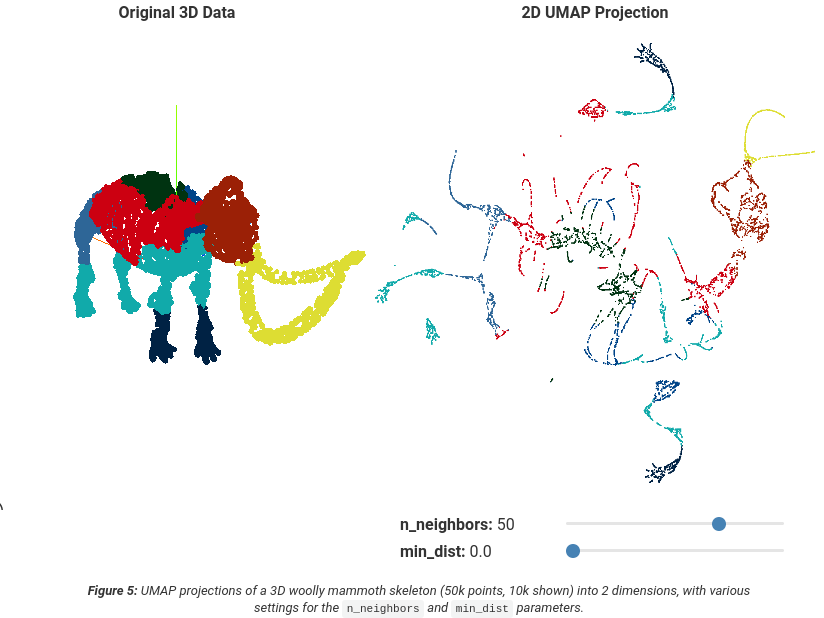

# Parameters and Structures
- Local structures are preserved after t-SNE or UMAP as the clusters
- Perplexity (t-SNE) and number of neighbors (UMAP) impact preservation of global structure

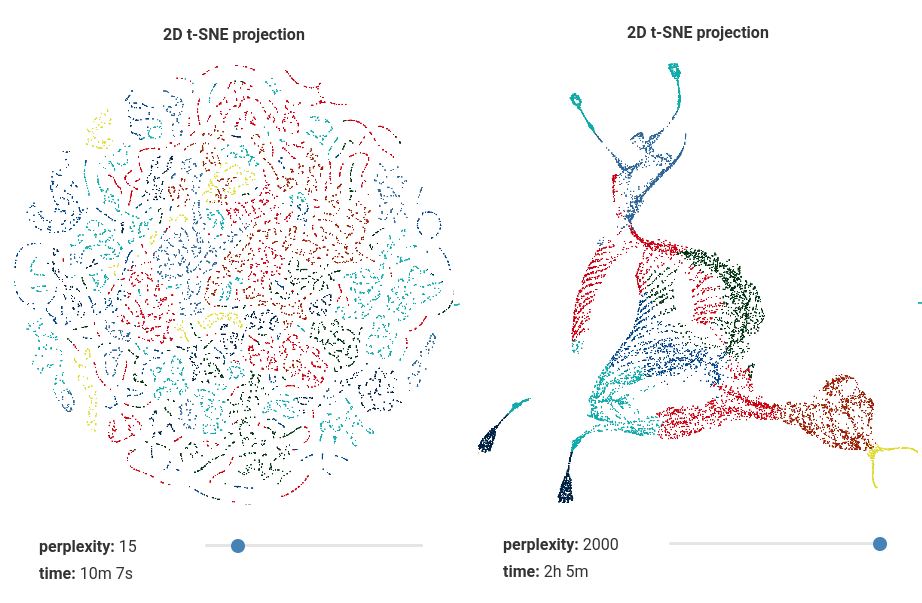

# IRIS dataset

## Project data into 2D with t-SNE

In [ ]:
from sklearn.manifold import TSNE
import plotly.express as px
from plotly.subplots import make_subplots

df = px.data.iris()

features = df.loc[:, :'petal_width']

tsne_2d = TSNE(n_components=2, random_state=42)
projections_2d = tsne_2d.fit_transform(features)

tsne_3d = TSNE(n_components=3, random_state=42)
projections_3d = tsne_3d.fit_transform(features)

# Create subplots with 1 row and 2 columns
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type': 'scatter'}, {'type': 'scatter3d'}]],
    subplot_titles=('2D Scatter Plot', '3D Scatter Plot')
)

# Create the 2D scatter plot
fig_2d = px.scatter(
    projections_2d, x=0, y=1,
    color=df.species, labels={'color': 'species'}
)

# Add the 2D scatter plot to the first subplot
for trace in fig_2d['data']:
    fig.add_trace(trace, row=1, col=1)

# Create the 3D scatter plot
fig_3d = px.scatter_3d(
    projections_3d, x=0, y=1, z=2,
    color=df.species, labels={'color': 'species'}
)
fig_3d.update_traces(marker_size=8)

# Add the 3D scatter plot to the second subplot
for trace in fig_3d['data']:
    fig.add_trace(trace, row=1, col=2)

# Update layout to adjust the size and titles
fig.update_layout(height=600, width=1200)

# Show the combined figure
fig.show()


## Project data into 3D with t-SNE

## Projections with UMAP

In [ ]:
!pip install umap-learn

from umap import UMAP
import plotly.express as px

df = px.data.iris()

features = df.loc[:, :'petal_width']

umap_2d = UMAP(n_components=2, init='random', random_state=42)
umap_3d = UMAP(n_components=3, init='random', random_state=42)

proj_2d = umap_2d.fit_transform(features)
proj_3d = umap_3d.fit_transform(features)

# Create the 2D scatter plot
fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=df.species, labels={'color': 'species'}
)

# Add the 2D scatter plot to the first subplot
for trace in fig_2d['data']:
    fig.add_trace(trace, row=1, col=1)

# Create the 3D scatter plot
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=df.species, labels={'color': 'species'}
)
fig_3d.update_traces(marker_size=8)

# Add the 3D scatter plot to the second subplot
for trace in fig_3d['data']:
    fig.add_trace(trace, row=1, col=2)

# Update layout to adjust the size and titles
fig.update_layout(height=600, width=1200)

# Show the combined figure
fig.show()

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



# MNIST Fashion dataset
- 28x28 size grayscale images
- 10 classes
  - T-shirt/top
  - Trouser
  - Pullover
  - Dress
  - Coat
  - Sandal
  - Shirt
  - Sneaker
  - Bag
  - Ankle boot
- We use 5000 samples
- t-SNE is run with perplexity=30
- UMAP is run with n_neighbors=15, min_dist=0.1

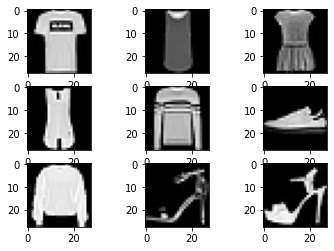

### Train the models

In [ ]:
# Import necessary libraries
import torch
from torchvision import datasets, transforms
import umap
from sklearn.manifold import TSNE
import plotly.express as px
from tqdm import tqdm  # For progress bar
import pandas as pd
import plotly.subplots as sp

# Mapping Fashion MNIST labels to clothing types and defining marker symbols
label_mapping = {
    0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
    5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'
}

# Define a set of distinct marker symbols
marker_symbols = ['circle', 'square', 'diamond', 'cross', 'x',
                  'triangle-up', 'triangle-down', 'triangle-left', 'triangle-right', 'pentagon']

# Load Fashion MNIST using PyTorch
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
fashion_mnist_data = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)

# Convert data to numpy arrays
images = fashion_mnist_data.data.numpy() / 255.0
labels = fashion_mnist_data.targets.numpy()

# Flatten the images for UMAP and t-SNE
images_flat = images.reshape(images.shape[0], -1)

# Take a subset of the data (for quicker computation)
n_samples = 5000
subset_images = images_flat[:n_samples]
subset_labels = labels[:n_samples]

# Apply UMAP for 2D and 3D
umap_2d = umap.UMAP(n_components=2, random_state=42) # n_neighbors=15, min_dist=0.1
umap_3d = umap.UMAP(n_components=3, random_state=42)

# Apply t-SNE for 2D and 3D
tsne_2d = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
tsne_3d = TSNE(n_components=3, random_state=42, perplexity=30, max_iter=1000)

# Perform UMAP embeddings with tqdm progress bars
with tqdm(total=n_samples, desc="UMAP 2D embedding") as pbar:
    umap_2d_embeddings = umap_2d.fit_transform(subset_images)
    pbar.update(n_samples)

with tqdm(total=n_samples, desc="UMAP 3D embedding") as pbar:
    umap_3d_embeddings = umap_3d.fit_transform(subset_images)
    pbar.update(n_samples)

# Perform t-SNE embeddings with tqdm progress bars
with tqdm(total=n_samples, desc="t-SNE 2D embedding") as pbar:
    tsne_2d_embeddings = tsne_2d.fit_transform(subset_images)
    pbar.update(n_samples)

with tqdm(total=n_samples, desc="t-SNE 3D embedding") as pbar:
    tsne_3d_embeddings = tsne_3d.fit_transform(subset_images)
    pbar.update(n_samples)

# Create DataFrames for UMAP and t-SNE embeddings
umap_2d_df = pd.DataFrame(umap_2d_embeddings, columns=['x', 'y'])
umap_3d_df = pd.DataFrame(umap_3d_embeddings, columns=['x', 'y', 'z'])
tsne_2d_df = pd.DataFrame(tsne_2d_embeddings, columns=['x', 'y'])
tsne_3d_df = pd.DataFrame(tsne_3d_embeddings, columns=['x', 'y', 'z'])

# Add labels and symbols to the DataFrames
for df in [umap_2d_df, umap_3d_df, tsne_2d_df, tsne_3d_df]:
    df['label'] = subset_labels
    df['clothing_type'] = df['label'].map(label_mapping)
    df['symbol'] = df['label'].map(dict(zip(label_mapping.keys(), marker_symbols)))




100%|██████████| 26421880/26421880 [00:01<00:00, 17593353.69it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 295664.17it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5320040.46it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 3252828.71it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



UMAP 2D embedding:   0%|          | 0/5000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

UMAP 3D embedding:   0%|          | 0/5000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

t-SNE 2D embedding:   0%|          | 0/5000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.

t-SNE 3D embedding:   0%|          | 0/5000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.

t-SNE 3D embedding: 100%|██████████| 5000/5000 [04:12<00:00, 19.77it/s]


**Visualize results**

In [ ]:
from plotly.subplots import make_subplots
import plotly.express as px

# 2D Plots
fig_2d = make_subplots(rows=1, cols=2, subplot_titles=('t-SNE 2D', 'UMAP 2D'))  # Swapped titles

# UMAP 2D plot
umap_2d_fig = px.scatter(umap_2d_df, x='x', y='y', color='clothing_type', symbol='symbol',
                         labels={'color': 'Clothing Type'}, title='UMAP 2D',
                         color_discrete_sequence=px.colors.qualitative.Safe)

# Remove symbol name from legend for UMAP 2D
for trace in umap_2d_fig.data:
    trace.showlegend = True
    trace.name = trace.name.split(",")[0]  # Remove the symbol name from the legend

# t-SNE 2D plot
tsne_2d_fig = px.scatter(tsne_2d_df, x='x', y='y', color='clothing_type', symbol='symbol',
                         labels={'color': 'Clothing Type'}, title='t-SNE 2D',
                         color_discrete_sequence=px.colors.qualitative.Safe)

# Remove symbol name from legend for t-SNE 2D
for trace in tsne_2d_fig.data:
    trace.showlegend = False
    trace.name = trace.name.split(",")[0]  # Remove the symbol name from the legend

# Add 2D plots to subplot figure (t-SNE first, UMAP second)
for trace in tsne_2d_fig['data']:
    fig_2d.add_trace(trace, row=1, col=1)

for trace in umap_2d_fig['data']:
    fig_2d.add_trace(trace, row=1, col=2)

# 3D Plots
fig_3d = make_subplots(rows=1, cols=2, specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}]],
                          subplot_titles=('t-SNE 3D', 'UMAP 3D'))  # Swapped titles

# UMAP 3D plot
umap_3d_fig = px.scatter_3d(umap_3d_df, x='x', y='y', z='z', color='clothing_type', symbol='symbol',
                            labels={'color': 'Clothing Type'}, title='UMAP 3D',
                            color_discrete_sequence=px.colors.qualitative.Safe)

# Remove symbol name from legend for UMAP 3D
for trace in umap_3d_fig.data:
    trace.showlegend = True
    trace.name = trace.name.split(",")[0]  # Remove the symbol name from the legend

# t-SNE 3D plot
tsne_3d_fig = px.scatter_3d(tsne_3d_df, x='x', y='y', z='z', color='clothing_type', symbol='symbol',
                            labels={'color': 'Clothing Type'}, title='t-SNE 3D',
                            color_discrete_sequence=px.colors.qualitative.Safe)

# Remove symbol name from legend for t-SNE 3D
for trace in tsne_3d_fig.data:
    trace.showlegend = False
    trace.name = trace.name.split(",")[0]  # Remove the symbol name from the legend

# Add 3D plots to subplot figure (t-SNE first, UMAP second)
for trace in tsne_3d_fig['data']:
    fig_3d.add_trace(trace, row=1, col=1)

for trace in umap_3d_fig['data']:
    fig_3d.add_trace(trace, row=1, col=2)

# Update layout to make the figures bigger and share the same legend
fig_2d.update_layout(height=1000, width=2200, legend_title_text="Clothing Type")
fig_3d.update_layout(height=1000, width=2200, legend_title_text="Clothing Type")

# Show both the 2D and 3D plot figures
fig_2d.show()
fig_3d.show()


# Vowel classification

*   Norwegian dataset with vowels
    *   i
    *   y
    *   e

*   Extracted segments from spoken sentences
*   Different speakers




In [ ]:
!pip install umap-learn
!unzip assignment3.zip

from transformers import HubertModel, WavLMModel, Wav2Vec2Model
import matplotlib.pyplot as plt
import pickle
import torch
import numpy as np
import pandas as pd
import scipy.io.wavfile as wav
from librosa.feature import mfcc
from librosa import resample
from umap import UMAP
from sklearn.manifold import TSNE
import os

print(os.listdir("."))

%matplotlib inline

plotting_colors = {
    "i": "tab:blue",
    "y": "tab:orange",
    "e": "tab:green"
}


def get_middle(array, length):
    if len(array) < length: # Zero-pad at end if to short
        return np.pad(array, (0, length - len(array)))

    start = (len(array) - length) // 2
    end = start + length

    return array[start:end]

def load_audio(filename, middle=True, middle_length=512, resample_waveform=True):
    rate, waveform = wav.read("assignment3//" + filename)
    print()

    waveform = waveform / 32767

    if resample_waveform:
        waveform = resample(waveform, orig_sr=rate, target_sr=16000)

    if middle:
        waveform = get_middle(waveform, middle_length)

    return waveform

  # open a file
test_file = open('assignment3//test.pkl', 'rb')
train_file = open('assignment3//train.pkl', 'rb')

# load pickled Pandas.DataFrame
test_data = pickle.load(test_file)
train_data = pickle.load(train_file)

# Split data into three vowels
test_i_mask = np.where(test_data["label"] == "i")
test_y_mask = np.where(test_data["label"] == "y")
test_e_mask = np.where(test_data["label"] == "e")
train_i_mask = np.where(train_data["label"] == "i")
train_y_mask = np.where(train_data["label"] == "y")
train_e_mask = np.where(train_data["label"] == "e")

X_train_raw = np.asarray([load_audio(audio_file) for audio_file in train_data["audio_file"]])
X_train_raw = ( X_train_raw - X_train_raw.mean(axis=0))

X_test_raw = np.asarray([load_audio(audio_file) for audio_file in test_data["audio_file"]])
X_test_raw = ( X_test_raw - X_test_raw.mean(axis=0))


# Use transform data into Mel-frequency cepstrum coefficient
X_train_mfcc = np.squeeze(mfcc(y=X_train_raw, sr=48000, n_mfcc=13, dct_type=2, hop_length=2048, n_fft=1024))
X_train_mfcc = ( X_train_mfcc - X_train_mfcc.mean(axis=0)) / X_train_mfcc.std(axis=0)

X_test_mfcc = np.squeeze(mfcc(y=X_test_raw, sr=48000, n_mfcc=13, dct_type=2, hop_length=2048, n_fft=1024))
X_test_mfcc = ( X_test_mfcc - X_test_mfcc.mean(axis=0)) / X_test_mfcc.std(axis=0)

print("Test data", X_test_mfcc.shape)
print("Train data", X_train_mfcc.shape)

i_raw_example = X_test_raw[test_i_mask][0]
y_raw_example = X_test_raw[test_y_mask][0]
e_raw_example = X_test_raw[test_e_mask][0]

Archive:  assignment3.zip
  inflating: assignment3/.DS_Store   
   creating: assignment3/audio/
  inflating: assignment3/audio/.DS_Store  
   creating: assignment3/audio/test/
  inflating: assignment3/audio/test/p1_g01_f1_3_t-c1191_6499_6603.wav  
  inflating: assignment3/audio/test/p1_g01_f1_3_t-c1524_4922_5030.wav  
  inflating: assignment3/audio/test/p1_g01_f1_4_x-b0381_4925_5058.wav  
  inflating: assignment3/audio/test/p1_g01_f1_5_x-b0016_4370_4520.wav  
  inflating: assignment3/audio/test/p1_g01_f1_5_x-b0171_4055_4182.wav  
  inflating: assignment3/audio/test/p1_g01_f1_5_x-b0544_2828_2952.wav  
  inflating: assignment3/audio/test/p1_g01_f2_1_t-b0267_7485_7598.wav  
  inflating: assignment3/audio/test/p1_g01_f2_1_t-c1068_3903_4005.wav  
  inflating: assignment3/audio/test/p1_g01_f2_1_t-c1870_2545_2622.wav  
  inflating: assignment3/audio/test/p1_g01_f2_3_t-b0473_3913_4060.wav  
  inflating: assignment3/audio/test/p1_g01_f2_3_t-c1554_2764_2898.wav  
  inflating: assignment3/audio/t

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=512
  warnings.warn(


Test data (300, 13)
Train data (750, 13)


In [ ]:
n_components = 2
umap_n_neighbors = 15

umap_raw = UMAP(n_neighbors=umap_n_neighbors)
raw_umap = umap_raw.fit_transform(X_train_raw)

umap_mfcc = UMAP(n_neighbors=umap_n_neighbors)
mfcc_umap = umap_mfcc.fit_transform(X_train_mfcc)

tsne_perplexity = 30
tsne_max_iter = 1000

tsne_raw = TSNE(perplexity=tsne_perplexity, max_iter=tsne_max_iter)
raw_tsne = tsne_raw.fit_transform(X_train_raw)

tsne_mfcc = TSNE(perplexity=tsne_perplexity, max_iter=tsne_max_iter)
mfcc_tsne = tsne_mfcc.fit_transform(X_train_mfcc)

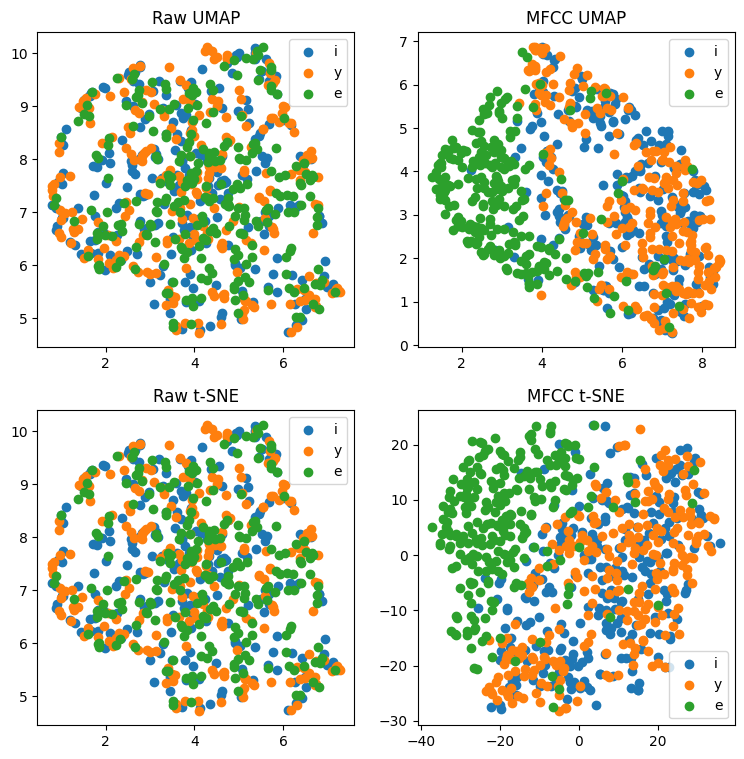

In [ ]:
fig, axes = plt.subplots(2, 2)
fig.set_figwidth(9)
fig.set_figheight(9)
fig.suptitle("", fontsize=20)

axes[0, 0].set_title("Raw UMAP")
axes[0, 0].scatter(raw_umap[train_i_mask][:, 0], raw_umap[train_i_mask][:, 1], color=plotting_colors["i"], label="i")
axes[0, 0].scatter(raw_umap[train_y_mask][:, 0], raw_umap[train_y_mask][:, 1], color=plotting_colors["y"], label="y")
axes[0, 0].scatter(raw_umap[train_e_mask][:, 0], raw_umap[train_e_mask][:, 1], color=plotting_colors["e"], label="e")

axes[0, 1].set_title("MFCC UMAP")
axes[0, 1].scatter(mfcc_umap[train_i_mask][:, 0], mfcc_umap[train_i_mask][:, 1], color=plotting_colors["i"], label="i")
axes[0, 1].scatter(mfcc_umap[train_y_mask][:, 0], mfcc_umap[train_y_mask][:, 1], color=plotting_colors["y"], label="y")
axes[0, 1].scatter(mfcc_umap[train_e_mask][:, 0], mfcc_umap[train_e_mask][:, 1], color=plotting_colors["e"], label="e")

axes[1, 0].set_title("Raw t-SNE")
axes[1, 0].scatter(raw_umap[train_i_mask][:, 0], raw_umap[train_i_mask][:, 1], color=plotting_colors["i"], label="i")
axes[1, 0].scatter(raw_umap[train_y_mask][:, 0], raw_umap[train_y_mask][:, 1], color=plotting_colors["y"], label="y")
axes[1, 0].scatter(raw_umap[train_e_mask][:, 0], raw_umap[train_e_mask][:, 1], color=plotting_colors["e"], label="e")

axes[1, 1].set_title("MFCC t-SNE")
axes[1, 1].scatter(mfcc_tsne[train_i_mask][:, 0], mfcc_tsne[train_i_mask][:, 1], color=plotting_colors["i"], label="i")
axes[1, 1].scatter(mfcc_tsne[train_y_mask][:, 0], mfcc_tsne[train_y_mask][:, 1], color=plotting_colors["y"], label="y")
axes[1, 1].scatter(mfcc_tsne[train_e_mask][:, 0], mfcc_tsne[train_e_mask][:, 1], color=plotting_colors["e"], label="e")

axes[0, 0].legend()
axes[0, 1].legend()
axes[1, 0].legend()
axes[1, 1].legend()
plt.show()

In [ ]:
import numpy as np
import torch

model_english = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-large-960h")
model_norwegian = Wav2Vec2Model.from_pretrained("NbAiLab/nb-wav2vec2-300m-bokmaal-v2")

audio = torch.FloatTensor(X_train_raw)
print(audio.shape)

# Extract features
features_english = model_english(audio).last_hidden_state.squeeze()
features_norwegian = model_norwegian(audio).last_hidden_state.squeeze()

print(features_english.shape)
print(features_norwegian.shape)

Some weights of Wav2Vec2Model were not initialized from the model checkpoint at facebook/wav2vec2-large-960h and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1', 'wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


config.json:   0%|          | 0.00/2.28k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

Some weights of Wav2Vec2Model were not initialized from the model checkpoint at NbAiLab/nb-wav2vec2-300m-bokmaal-v2 and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


torch.Size([750, 512])
torch.Size([750, 1024])
torch.Size([750, 1024])


In [ ]:
n_components = 2

umap_n_neighbors = 15

umap_features_english = UMAP(n_neighbors=umap_n_neighbors)
features_english_umap = umap_mfcc.fit_transform(features_english.cpu().detach().numpy())

umap_features_norwegian = UMAP(n_neighbors=umap_n_neighbors)
features_norwegian_umap = umap_mfcc.fit_transform(features_norwegian.cpu().detach().numpy())

tsne_perplexity = 30
tsne_max_iter = 10000

tsne_features_english = TSNE(perplexity=tsne_perplexity, max_iter=tsne_max_iter)
features_english_tsne = tsne_features_english.fit_transform(features_english.cpu().detach().numpy())

tsne_features_norwegian = TSNE(perplexity=tsne_perplexity, max_iter=tsne_max_iter)
features_norwegian_tsne = tsne_features_norwegian.fit_transform(features_norwegian.cpu().detach().numpy())

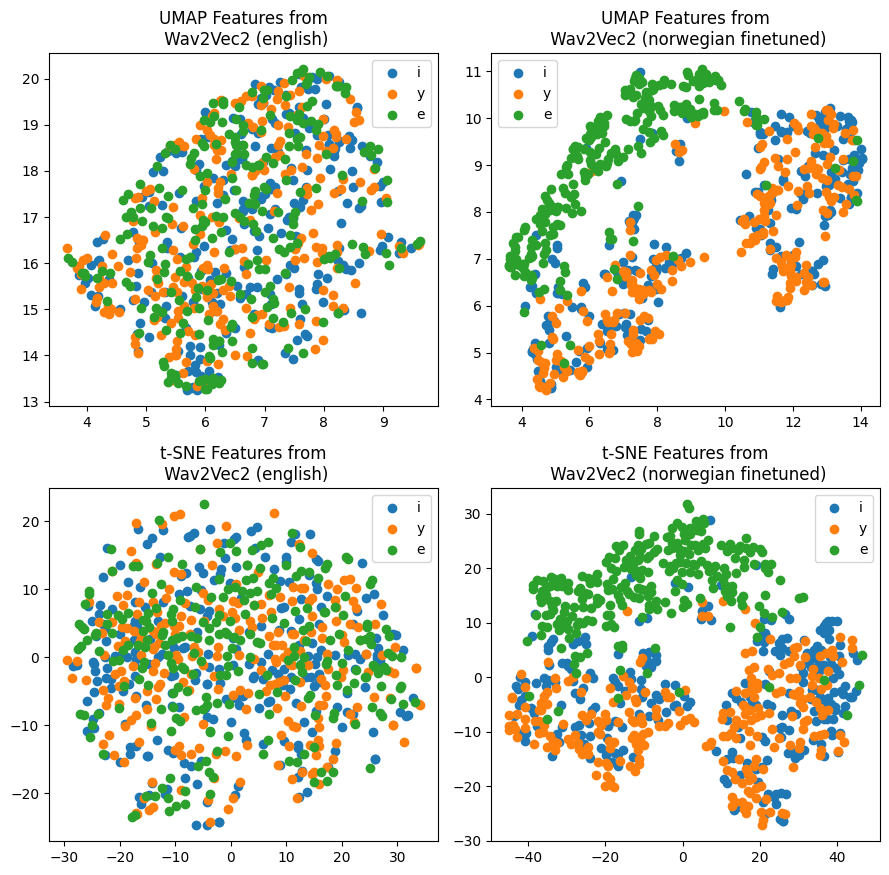

In [ ]:
fig, axes = plt.subplots(2, 2)
fig.set_figwidth(9)
fig.set_figheight(9)
fig.suptitle("", fontsize=20)

axes[0, 0].set_title("UMAP Features from\n Wav2Vec2 (english)")
axes[0, 0].scatter(features_english_umap[train_i_mask][:, 0], features_english_umap[train_i_mask][:, 1], color=plotting_colors["i"], label="i")
axes[0, 0].scatter(features_english_umap[train_y_mask][:, 0], features_english_umap[train_y_mask][:, 1], color=plotting_colors["y"], label="y")
axes[0, 0].scatter(features_english_umap[train_e_mask][:, 0], features_english_umap[train_e_mask][:, 1], color=plotting_colors["e"], label="e")

axes[0, 1].set_title("UMAP Features from\n Wav2Vec2 (norwegian finetuned)")
axes[0, 1].scatter(features_norwegian_umap[train_i_mask][:, 0], features_norwegian_umap[train_i_mask][:, 1], color=plotting_colors["i"], label="i")
axes[0, 1].scatter(features_norwegian_umap[train_y_mask][:, 0], features_norwegian_umap[train_y_mask][:, 1], color=plotting_colors["y"], label="y")
axes[0, 1].scatter(features_norwegian_umap[train_e_mask][:, 0], features_norwegian_umap[train_e_mask][:, 1], color=plotting_colors["e"], label="e")

axes[1, 0].set_title("t-SNE Features from\n Wav2Vec2 (english)")
axes[1, 0].scatter(features_english_tsne[train_i_mask][:, 0], features_english_tsne[train_i_mask][:, 1], color=plotting_colors["i"], label="i")
axes[1, 0].scatter(features_english_tsne[train_y_mask][:, 0], features_english_tsne[train_y_mask][:, 1], color=plotting_colors["y"], label="y")
axes[1, 0].scatter(features_english_tsne[train_e_mask][:, 0], features_english_tsne[train_e_mask][:, 1], color=plotting_colors["e"], label="e")

axes[1, 1].set_title("t-SNE Features from\n Wav2Vec2 (norwegian finetuned)")
axes[1, 1].scatter(features_norwegian_tsne[train_i_mask][:, 0], features_norwegian_tsne[train_i_mask][:, 1], color=plotting_colors["i"], label="i")
axes[1, 1].scatter(features_norwegian_tsne[train_y_mask][:, 0], features_norwegian_tsne[train_y_mask][:, 1], color=plotting_colors["y"], label="y")
axes[1, 1].scatter(features_norwegian_tsne[train_e_mask][:, 0], features_norwegian_tsne[train_e_mask][:, 1], color=plotting_colors["e"], label="e")

axes[0, 0].legend()
axes[0, 1].legend()
axes[1, 0].legend()
axes[1, 1].legend()
plt.tight_layout()
plt.show()

# How to missread t-SNE & UMAP
- Hyperparameters really matter
  - Here UMAP's speed helps, allowing for several runs with diff. parameters
- Cluster sizes in a UMAP plot mean nothing
  - Both use local notions of distance when forming low dim clusters
- Distances between clusters might not mean anything
  - Both use local notions of distance when forming low dim clusters
- Random noise doesn't always look random
  - Especially for low values of n_neighbors in UMAP
- You may need more than one plot
  - They are not deteministic (UMAP is more stable then t-SNE)

# Sources
- https://distill.pub/2016/misread-tsne/
- https://pair-code.github.io/understanding-umap/
- https://www.youtube.com/watch?v=015vL0cJfA0&ab_channel=KrishNaik


In [ ]:
# Import necessary libraries
!pip install umap-learn

import torch
from torchvision import datasets, transforms
import umap
from sklearn.manifold import TSNE
import plotly.express as px
from tqdm import tqdm  # For progress bar
import pandas as pd
import plotly.subplots as sp

# Mapping Fashion MNIST labels to clothing types and defining marker symbols
label_mapping = {
    0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
    5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'
}

# Define a set of distinct marker symbols
marker_symbols = ['circle', 'square', 'diamond', 'cross', 'x',
                  'triangle-up', 'triangle-down', 'triangle-left', 'triangle-right', 'pentagon']

# Load Fashion MNIST using PyTorch
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
fashion_mnist_data = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)

# Convert data to numpy arrays
images = fashion_mnist_data.data.numpy() / 255.0
labels = fashion_mnist_data.targets.numpy()

# Flatten the images for UMAP and t-SNE
images_flat = images.reshape(images.shape[0], -1)

# Take a subset of the data (for quicker computation)
n_samples = 5000
subset_images = images_flat[:n_samples]
subset_labels = labels[:n_samples]

# Apply UMAP for 2D and 3D
umap_2d = umap.UMAP(n_components=2, random_state=42) # n_neighbors=15, min_dist=0.1
umap_3d = umap.UMAP(n_components=3, random_state=42)

# Apply t-SNE for 2D and 3D
tsne_2d = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
tsne_3d = TSNE(n_components=3, random_state=42, perplexity=30, max_iter=1000)

# Perform UMAP embeddings with tqdm progress bars
with tqdm(total=n_samples, desc="UMAP 2D embedding") as pbar:
    umap_2d_embeddings = umap_2d.fit_transform(subset_images)
    pbar.update(n_samples)

with tqdm(total=n_samples, desc="UMAP 3D embedding") as pbar:
    umap_3d_embeddings = umap_3d.fit_transform(subset_images)
    pbar.update(n_samples)

# Perform t-SNE embeddings with tqdm progress bars
with tqdm(total=n_samples, desc="t-SNE 2D embedding") as pbar:
    tsne_2d_embeddings = tsne_2d.fit_transform(subset_images)
    pbar.update(n_samples)

with tqdm(total=n_samples, desc="t-SNE 3D embedding") as pbar:
    tsne_3d_embeddings = tsne_3d.fit_transform(subset_images)
    pbar.update(n_samples)

# Create DataFrames for UMAP and t-SNE embeddings
umap_2d_df = pd.DataFrame(umap_2d_embeddings, columns=['x', 'y'])
umap_3d_df = pd.DataFrame(umap_3d_embeddings, columns=['x', 'y', 'z'])
tsne_2d_df = pd.DataFrame(tsne_2d_embeddings, columns=['x', 'y'])
tsne_3d_df = pd.DataFrame(tsne_3d_embeddings, columns=['x', 'y', 'z'])

# Add labels and symbols to the DataFrames
for df in [umap_2d_df, umap_3d_df, tsne_2d_df, tsne_3d_df]:
    df['label'] = subset_labels
    df['clothing_type'] = df['label'].map(label_mapping)
    df['symbol'] = df['label'].map(dict(zip(label_mapping.keys(), marker_symbols)))




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.8 MB/s eta 0:00:00


100%|██████████| 26421880/26421880 [00:01<00:00, 15939923.98it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 303446.35it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5672425.48it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5097326.96it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



UMAP 2D embedding:   0%|          | 0/5000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
UMAP 3D embedding:   0%|          | 0/5000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
t-SNE 3D embedding: 100%|██████████| 5000/5000 [03:04<00:00, 27.11it/s]
